In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
!pip install quandl
import quandl

In [100]:
import yfinance as yf
start='2012-01-01'
end='2023-11-15'

stock='GOOG'

df=yf.download(stock,start,end)
df.reset_index(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
3,2012-01-06,16.069294,16.316011,16.063607,16.294997,108119746
4,2012-01-09,15.387976,15.994635,15.357568,15.982273,233776981
...,...,...,...,...,...,...
2982,2023-11-08,132.267975,132.545889,131.176173,131.374681,15093600
2983,2023-11-09,130.709656,132.962761,130.530988,132.367222,17976500
2984,2023-11-10,133.061996,133.270440,129.895742,130.550832,20872900


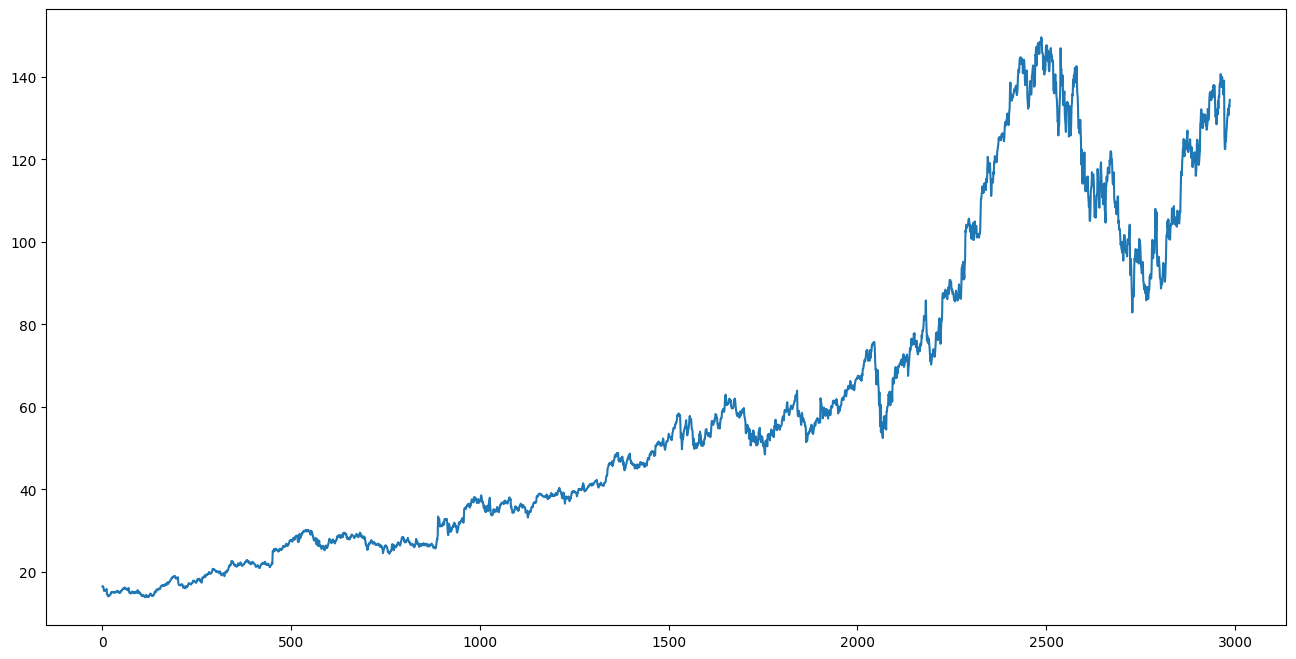

In [101]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label = 'Closing Price')

Classification problem : Buy (+1) or sell (-1) the stock

In [102]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

Input Festures to Predict wheather customer should Buy or Sell the Stock.

In [103]:
X = df[['Open - Close', 'High - Low']]
X.head()

Price,Open - Close,High - Low
Ticker,,
0,-0.308273,0.390102
1,-0.080343,0.238065
2,0.077131,0.191343
3,0.225703,0.252404
4,0.594298,0.637068


Intention is to share +1 for buy signal and -1 for the sell signal. The target Varialble is "Y"for the classification test.

In [104]:
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1).flatten()

In [105]:
Y

array([ 1, -1, -1, ..., -1,  1, -1], shape=(2987,))

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 44)

Implementation KNN Classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using  gridsearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.66
Test_data Accuracy: 0.49


In [108]:
predictions_classification = model.predict(X_test)

In [109]:
# Creating a dataframe with the actual and predicted classes.
actual_predicted_data = pd.DataFrame({'Actual Class': y_test.flatten(), 'Predicted Class':predictions_classification.flatten()})

In [110]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,1
1,1,1
2,-1,-1
3,1,-1
4,-1,1
5,-1,-1
6,1,1
7,1,-1
8,1,1
9,1,-1


Regression Problem : KNN

In [111]:
y = df['Close']

In [112]:
y

Ticker,GOOG
0,16.449755
1,16.520704
2,16.291536
3,16.069294
4,15.387976
...,...
2982,132.267975
2983,130.709656
2984,133.061996
2985,132.645157


Implementation of KNN Regression

In [113]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

#using GridSearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and make the predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [114]:
print(predictions)

[[ 95.80873925]
 [ 28.1990727 ]
 [ 29.52638149]
 [ 42.41101769]
 [ 22.98366383]
 [118.73851558]
 [ 39.60348157]
 [ 98.62036324]
 [ 77.08059992]
 [ 19.33055503]
 [ 78.258758  ]
 [ 21.55224385]
 [ 96.76343591]
 [ 33.04660293]
 [ 44.52052471]
 [ 40.03755937]
 [ 89.74114023]
 [ 26.46347945]
 [ 82.54365812]
 [ 29.96470765]
 [ 20.49106257]
 [ 26.84222896]
 [103.52919224]
 [ 26.54463305]
 [ 70.01809951]
 [ 86.59775325]
 [ 41.42538459]
 [ 34.61073671]
 [ 22.36650269]
 [106.28247234]
 [ 43.01961408]
 [ 46.80408641]
 [ 31.36796202]
 [ 30.21102551]
 [ 45.89849295]
 [ 52.70512731]
 [ 21.29699714]
 [ 26.64677988]
 [115.49009214]
 [ 19.5274979 ]
 [ 29.17286961]
 [113.41997201]
 [ 28.25094591]
 [102.92717307]
 [ 19.39540359]
 [109.80923625]
 [ 23.39450952]
 [ 27.19264855]
 [ 63.85355118]
 [ 33.35041571]
 [ 34.65316813]
 [111.48161588]
 [ 76.01810019]
 [ 29.2651795 ]
 [ 52.857878  ]
 [ 38.2222991 ]
 [ 77.870815  ]
 [ 70.55156463]
 [114.66262109]
 [ 32.53134707]
 [118.4366357 ]
 [ 31.9745591 ]
 [104.72

In [115]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(predictions)),2)))
rms

np.float64(67.89363819176083)

In [116]:
valid = pd.DataFrame({'Actual Close':y_test_reg.values.flatten(),'Predicted Close value':predictions.flatten()})

In [117]:
valid.head(10)

,Actual Close,Predicted Close value
0,137.881851,95.808739
1,40.176662,28.199073
2,19.357962,29.526381
3,37.939442,42.411018
4,15.066601,22.983664
5,101.457062,118.738516
6,25.523928,39.603482
7,52.144409,98.620363
8,68.901733,77.080600
9,16.817852,19.330555
